In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Define the parameters
input_shape = (224, 224, 3)  # Input image shape
num_classes = 20  # Number of persons in the dataset
batch_size = 32
epochs = 20

In [ ]:
# Load the pre-trained VGG19 model without the top layer
base_model = keras.applications.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

In [ ]:
# Freeze the pre-trained layers
base_model.trainable = False


In [ ]:
# Add a new classifier on top of the pre-trained layers
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
# Create a data generator for loading the images
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Load the images from the dataset folders
train_dataset = data_generator.flow_from_directory(
    '/content/gdrive/MyDrive/Project Gait Analysis/Result/Dataset_avg_img_train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'  # Assumes folder names represent the class labels
)

Found 80 images belonging to 20 classes.


In [ ]:
# Train the model
history=model.fit(
    train_dataset,
    epochs=epochs
)

Epoch 1/20
3/3 [==============================] - 66s 19s/step - loss: 7.3883 - accuracy: 0.0625
Epoch 2/20
3/3 [==============================] - 66s 20s/step - loss: 6.9347 - accuracy: 0.0625
Epoch 3/20
3/3 [==============================] - 67s 20s/step - loss: 5.2701 - accuracy: 0.0750
Epoch 4/20
3/3 [==============================] - 65s 20s/step - loss: 4.2539 - accuracy: 0.0750
Epoch 5/20
3/3 [==============================] - 64s 19s/step - loss: 3.7582 - accuracy: 0.0875
Epoch 6/20
3/3 [==============================] - 68s 21s/step - loss: 3.2484 - accuracy: 0.0875
Epoch 7/20
3/3 [==============================] - 64s 20s/step - loss: 2.7386 - accuracy: 0.3000
Epoch 8/20
3/3 [==============================] - 65s 19s/step - loss: 2.6620 - accuracy: 0.2750
Epoch 9/20
3/3 [==============================] - 67s 21s/step - loss: 2.6750 - accuracy: 0.1750
Epoch 10/20
3/3 [==============================] - 65s 26s/step - loss: 2.5427 - accuracy: 0.4375
Epoch 11/20
3/3 [============

In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(train_dataset)
print('Accuracy:', accuracy)

3/3 [==============================] - 67s 21s/step - loss: 1.9199 - accuracy: 0.7000
Accuracy: 0.699999988079071


Epoch 1/20
3/3 [==============================] - 65s 19s/step - loss: 1.8796 - accuracy: 0.6125
Epoch 2/20
3/3 [==============================] - 65s 20s/step - loss: 1.8073 - accuracy: 0.6625
Epoch 3/20
3/3 [==============================] - 69s 21s/step - loss: 1.7634 - accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 65s 20s/step - loss: 1.7082 - accuracy: 0.8125
Epoch 5/20
3/3 [==============================] - 65s 19s/step - loss: 1.6624 - accuracy: 0.8250
Epoch 6/20
3/3 [==============================] - 67s 27s/step - loss: 1.6180 - accuracy: 0.7625
Epoch 7/20
3/3 [==============================] - 64s 19s/step - loss: 1.5535 - accuracy: 0.8250
Epoch 8/20
3/3 [==============================] - 63s 25s/step - loss: 1.5000 - accuracy: 0.9000
Epoch 9/20
3/3 [==============================] - 66s 27s/step - loss: 1.4436 - accuracy: 0.8625
Epoch 10/20
3/3 [==============================] - 65s 26s/step - loss: 1.4028 - accuracy: 0.8500
Epoch 11/20
3/3 [============

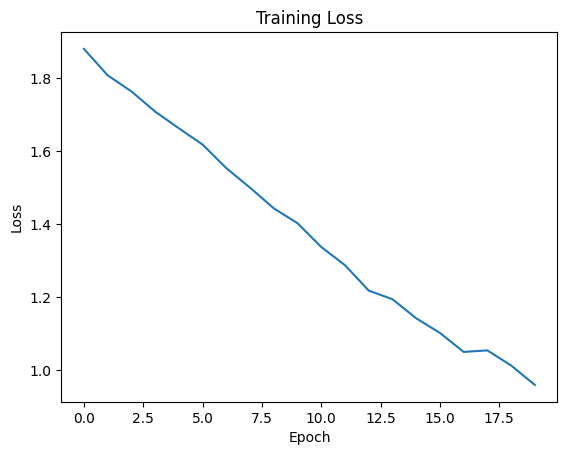

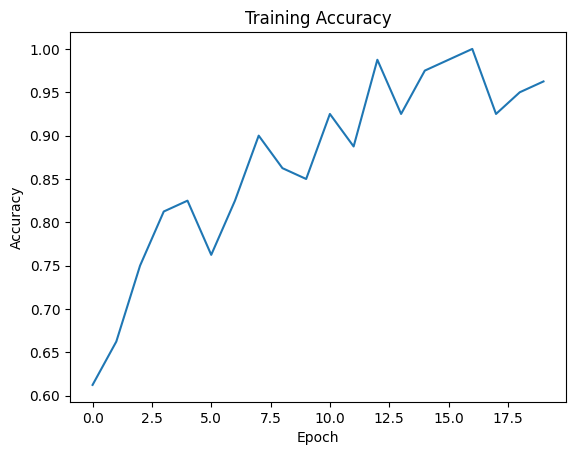

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
